## Polytope Climate-DT Country cut-out example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [1]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [2]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-geo
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [6]:
import earthkit.data
import earthkit.plots
import earthkit.geo.cartography
from polytope.api import Client

In [7]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [8]:
countries = ["Germany"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {
    "activity": "scenariomip",
    "class": "d1",
    "dataset": "climate-dt",
    "experiment": "ssp3-7.0",
    "generation": "1",
    "levtype": "sfc",
    "date": -1,
    "model": "ifs-nemo",
    "expver": "0001",
    "param": "167/165",
    "realization": "1",
    "resolution": "high",
    "stream": "clte",
    "type": "fc",
    "time": "1200",
    "feature": {
        #"axes": ["longitude", "latitude"],
        "type": "polygon",
        "shape": shapes
    },
}

In [ ]:
data_file = "data/climate-dt-earthkit-fe-polygon.covjson"
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
    data.to_target("file", data_file)
else:
    data = earthkit.data.from_source("file", data_file) 

In [10]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 422kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 8796)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-09-08 12:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 70kB 0 1 2 3 4 5 ... 8790 8791 8792 8793 8794 8795
    latitude   (points) float64 70kB 47.31 47.36 47.36 ... 54.87 54.87 54.87
    longitude  (points) float64 70kB 10.2 10.21 10.31 ... 8.738 8.857 8.976
    levelist   (points) float64 70kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 70kB 4.589 ... 7.824
    2t         (datetimes, number, steps, points) float64 70kB 283.8 ... 288.6
Attributes: (12/15)
    activity:     scenariomip
    class:        d1
    dataset:      climate-dt
    experiment:   ssp3-7.0
    expver:       0001
    generation:   1
    ...           ...
    resolution:   high
    stream:       clte
    type:         fc
    number:       0
    step:         0
    date:         2025-09-08 12:00:00Z

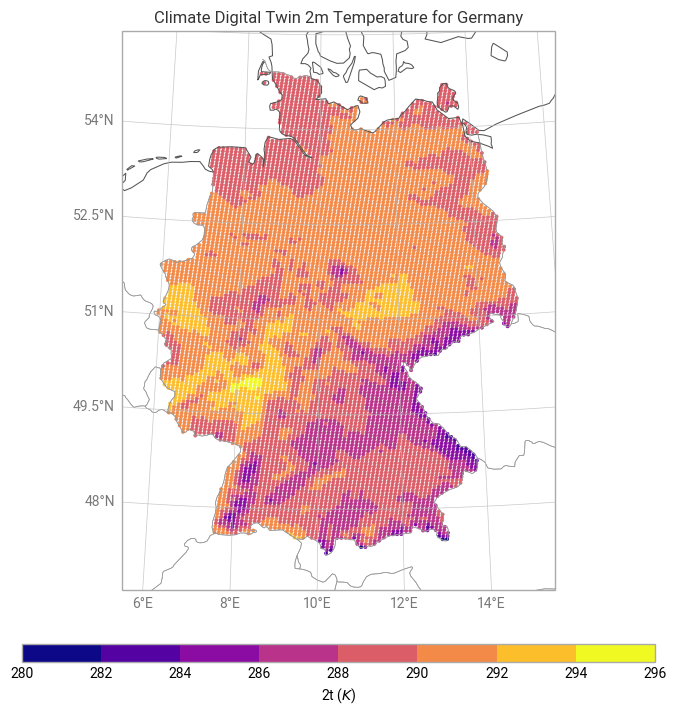

In [11]:
chart = earthkit.plots.Map(domain=["Germany"])
chart.point_cloud(
    ds['2t'],
    x="longitude",
    y="latitude",
    auto_style=True
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("Climate Digital Twin 2m Temperature for Germany")

chart.legend()

chart.show()